In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from AnastrisTNG import TNGsimulation # https://github.com/wx-ys/AnastrisTNG

In [2]:
path = '/home/yxi/Simulation/sims/TNG50-1/output'
snap = 99
snapshot = TNGsimulation.Snapshot(path,snap)
snapshot.load_particle_para['star_fields'] = ['GFM_StellarFormationTime','BirthPos','BirthVel','GFM_InitialMass',]

In [3]:
with h5py.File("TNG50_subhalo_10.hdf5", "r") as file:
    ID = 10
    snap_all = list(file[f"{ID}"].keys())
    snap_all = np.sort(np.int16(snap_all))
    a = np.array([file[f"{ID}/{i}"]['a'][...] for i in snap_all])           # scale factor
    ang_mom = np.array([file[f"{ID}/{i}"]['ang_mom'][...] for i in snap_all])# angular momentum
    cpos = np.array([file[f"{ID}/{i}"]['cpos'][...] for i in snap_all])     # comoving position  "a kpc"
    cvel = np.array([file[f"{ID}/{i}"]['cvel'][...] for i in snap_all])     # comoving velocity "a kpc/Gyr"
    t = np.array([file[f"{ID}/{i}"]['t'][...] for i in snap_all])           # time "Gyr"
    
    re99 = file[f"{ID}/{99}"]['re'][...]
    pos99 = file[f"{ID}/{99}"]['pos'][...]
    vel99 = file[f"{ID}/{99}"]['vel'][...]
    ang_mom99 = file[f"{ID}/{99}"]['ang_mom'][...]

In [4]:
from galpos.anastristng_decorate import make_star_birth, SimArray

In [5]:
birth_centered = make_star_birth(snapshot, 10, host_t = t, host_pos=SimArray(cpos, "a kpc"), host_vel=SimArray(cvel, "a kpc Gyr**-1"), 
                        angular_momentum = ang_mom)
birth_centered.align_with_galaxy(orientation_align = False)
birth_centered.physical_units()

In [6]:
birth_aligned = make_star_birth(snapshot, 10, host_t = t, host_pos=SimArray(cpos, "a kpc"), host_vel=SimArray(cvel, "a kpc Gyr**-1"), 
                        angular_momentum = ang_mom)
birth_aligned.align_with_galaxy(orientation_align = True)
birth_aligned.physical_units()

In [7]:
sub = snapshot.load_particle(ID)# physical units and center
sub.physical_units()
sub.check_boundary()

# transform align recorded info
sub.shift(pos = pos99,vel = vel99)
trans99 = TNGsimulation.calc_faceon_matrix(ang_mom99)
sub._transform(trans99)

In [8]:
birth_centered.rotate(trans99)

/home/yxi/Simulation/pynbody/pynbody/transformation.py:241: UserWarning: StarBirth usually does not require any coordinate transformations, the only available transformation method is align_with_galaxy
  self.sim._register_transformation(self)


<Transformation rotate>

In [9]:
from galpos.plot_tools import plot_sfr_evolution

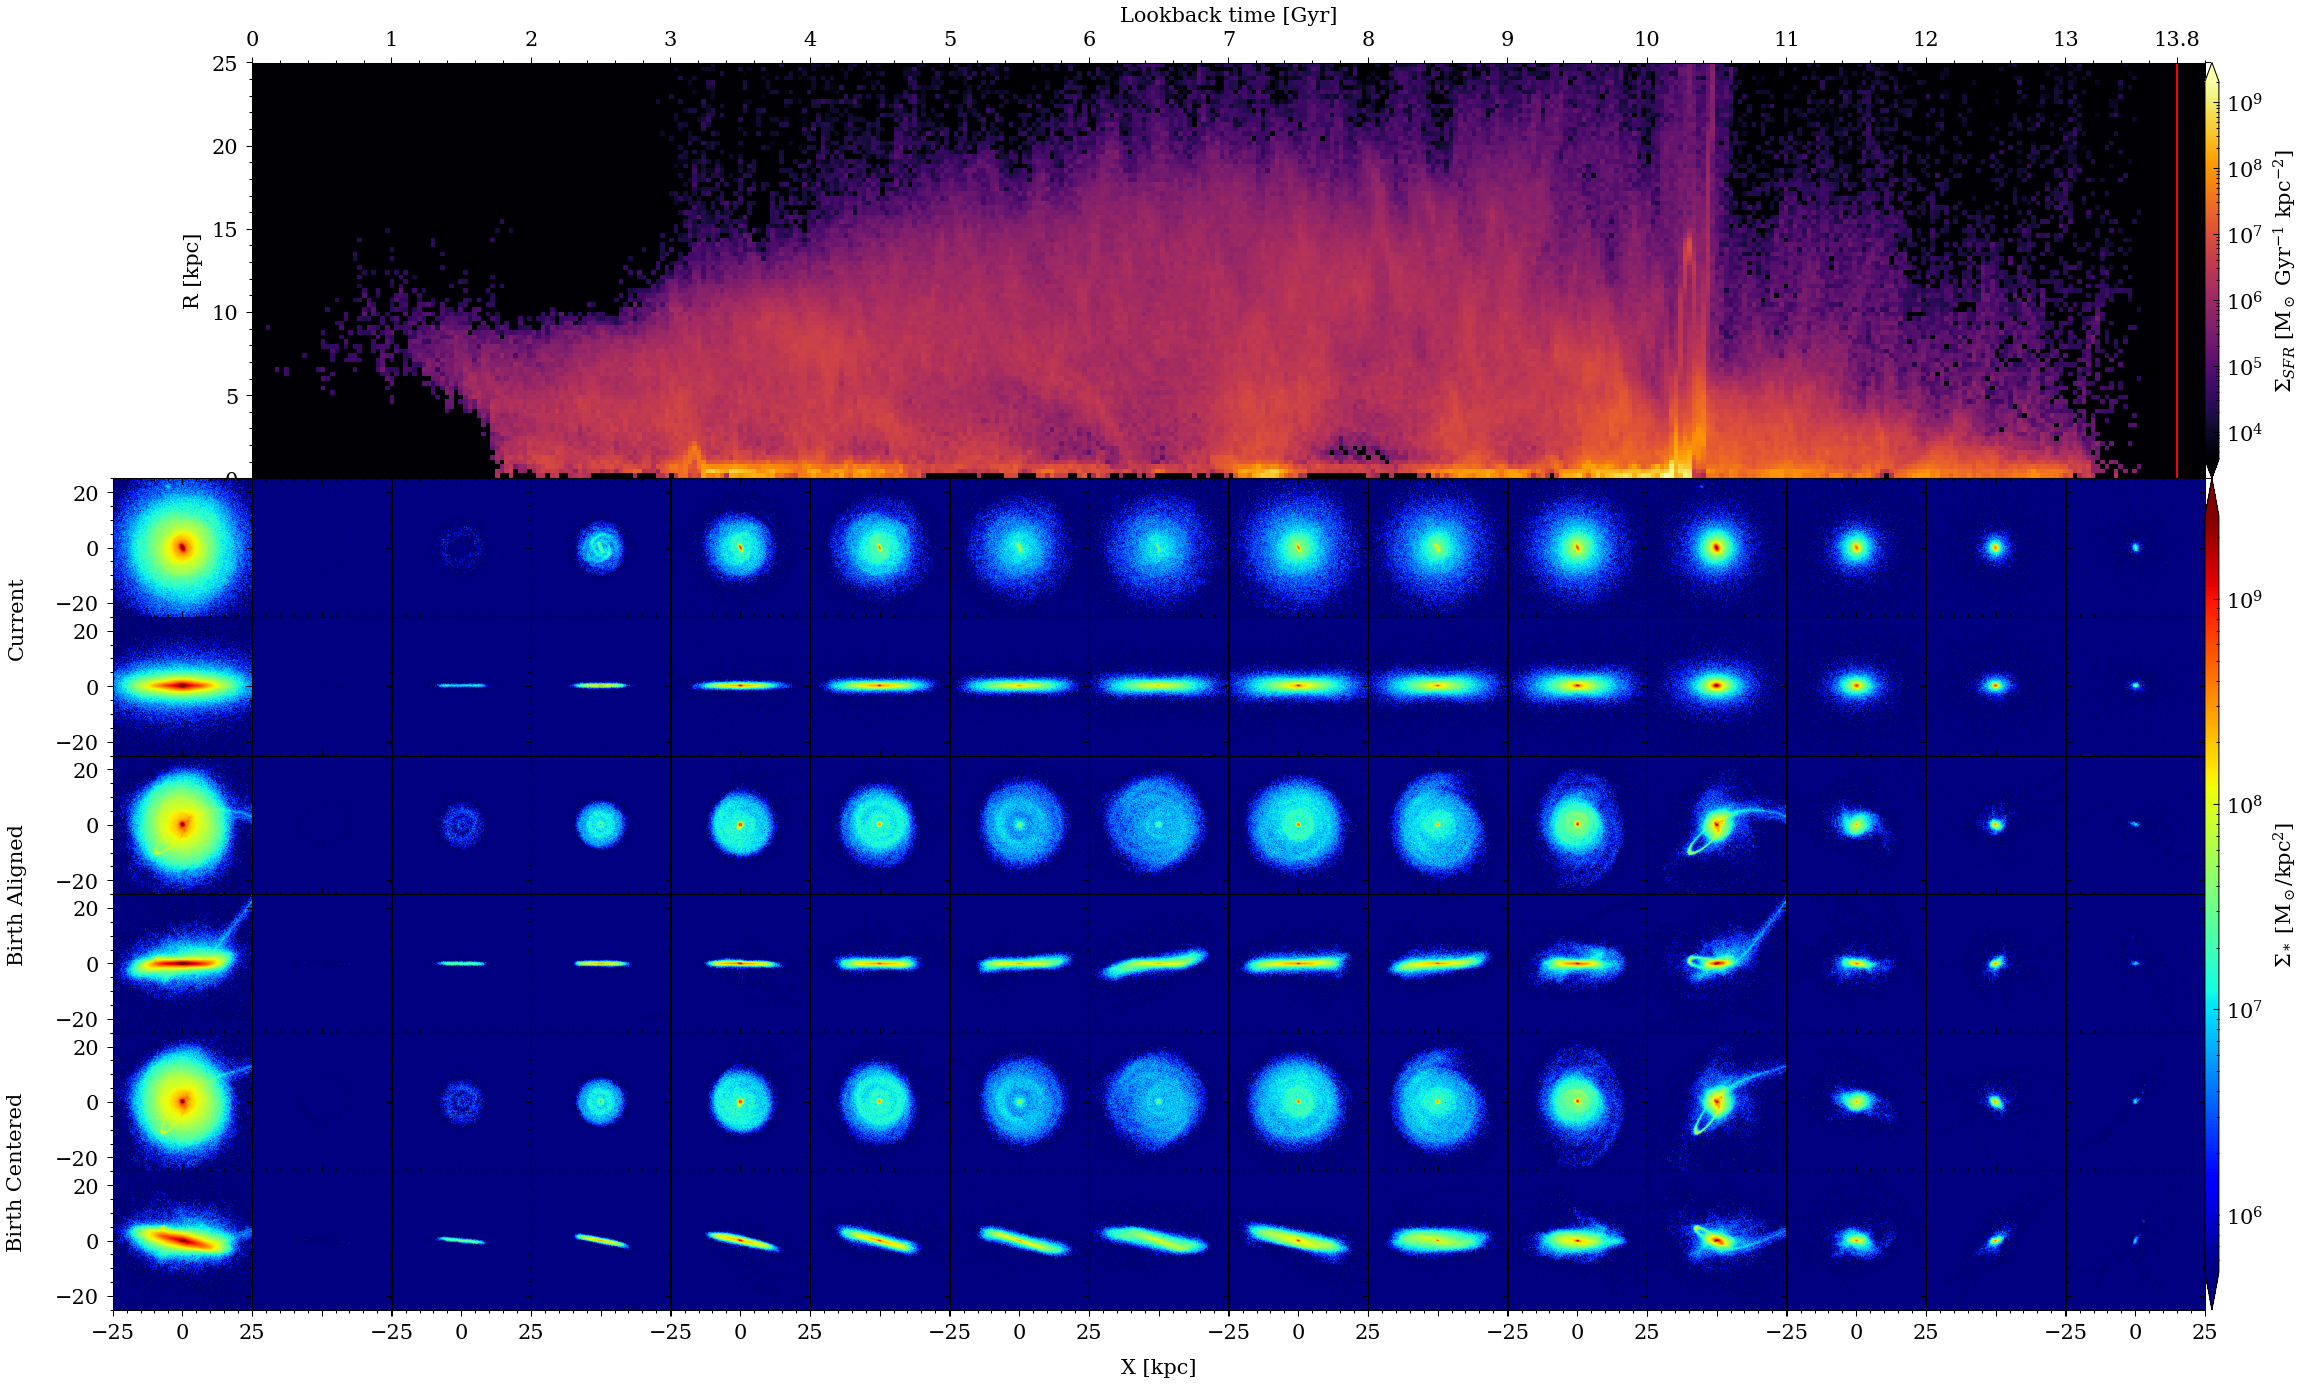

In [11]:
plot_sfr_evolution(sub, birth_centered, birth_aligned)
plt.savefig("sfr_evolution.png", dpi=300)